# Music Clustering Project

### Step 1: Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


df = pd.read_csv('ML_spotify_data.csv')

print('Original DataFrame:')
print(df.head())

features = ['danceability', 'valence', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Scaled data (first 5 rows):')
print(X_scaled[:5])

Original DataFrame:
                                               name            artists  \
0              We're For The Dark - Remastered 2010      ['Badfinger']   
1                       Sixty Years On - Piano Demo     ['Elton John']   
2                           Got to Find Another Way  ['The Guess Who']   
3  Feelin' Alright - Live At The Fillmore East/1970     ['Joe Cocker']   
4                                  Caravan - Take 7   ['Van Morrison']   

   popularity  danceability  valence  energy  explicit  key  liveness  \
0          22         0.678    0.559   0.432         0    3    0.0727   
1          25         0.456    0.259   0.368         0    6    0.1560   
2          21         0.433    0.833   0.724         0    0    0.1700   
3          22         0.436    0.870   0.914         0    5    0.8550   
4          23         0.669    0.564   0.412         0    7    0.4010   

   loudness  speechiness    tempo  
0   -12.696       0.0334  117.674  
1   -10.692       0.0280

### Step 2: K-Means Clustering and Evaluation
We will use the Elbow Method and Silhouette Score to determine the optimal number of clusters (k) for K-Means.

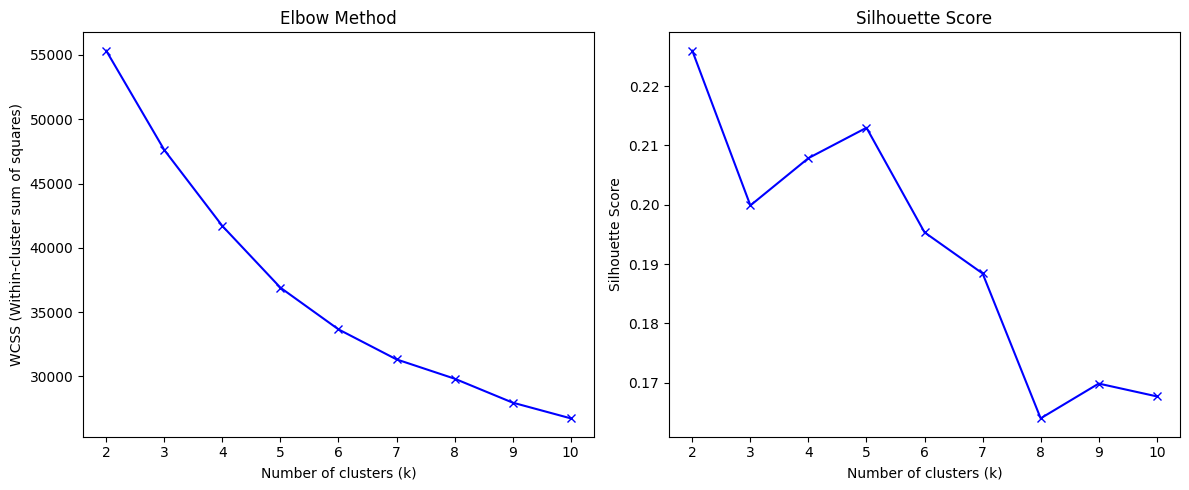

In [2]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bx-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Step 3: Visualizing the Clusters

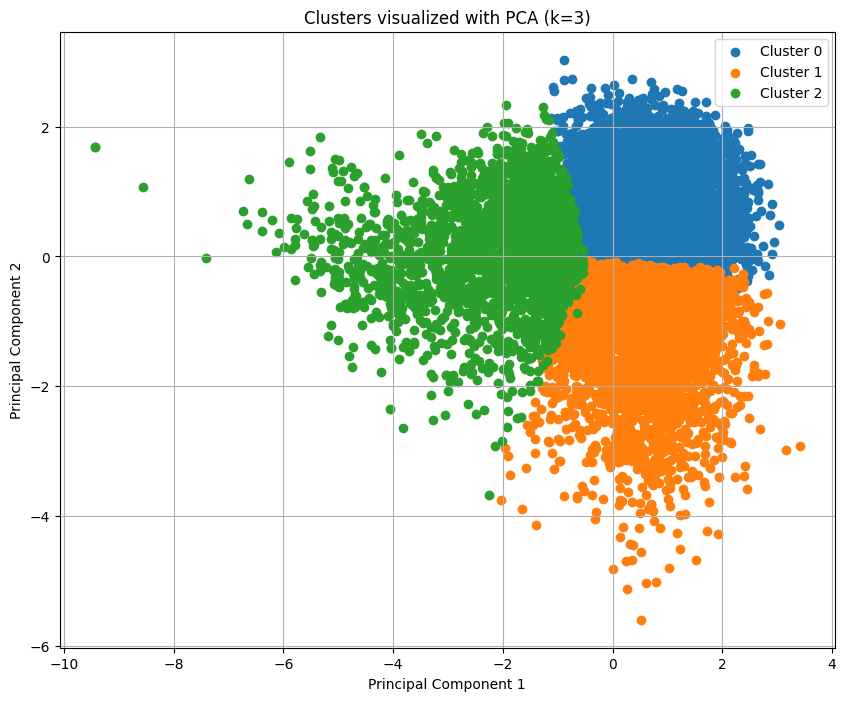

In [3]:

optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_optimal.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Cluster {cluster_id}'
    )
plt.title(f'Clusters visualized with PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Step 4: Cluster Interpretation

In [4]:
print('Cluster Analysis:')
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

Cluster Analysis:
         danceability   valence    energy  liveness   loudness  speechiness  \
cluster                                                                       
0            0.684047  0.696203  0.637998  0.155252  -8.606991     0.090760   
1            0.448566  0.458771  0.777850  0.330329  -7.067946     0.096350   
2            0.425701  0.280785  0.272406  0.158871 -15.595600     0.044998   

              tempo  
cluster              
0        114.461728  
1        138.375302  
2        107.786020  
